In [295]:
# Model design
import agentpy as ap
import joblib
import numpy as np
from frozendict import frozendict
import json
from matplotlib import rc
import os

# Visualization
import seaborn as sns
import pandas as pd

import scipy.stats
import datetime
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import networkx as nx

from sklearn.ensemble import IsolationForest
from sklearn import mixture
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from scipy.stats import ks_2samp

from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


from numpy.random import default_rng
from sklearn.metrics import matthews_corrcoef as mcc 
from sklearn.metrics import classification_report

In [296]:
#sender_info['y_true'] = sender_info['true_sender_type'].apply(lambda x: 1 if x =='suspicious' else 0)
#sender_info.drop(columns=['Unnamed: 0'], inplace=True)
#sender_info.rename(columns={'true_sender_type':'agent_y_true'}, inplace=True)

In [297]:
y_true.value_counts()

0    989
1     10
Name: y_true, dtype: int64

In [298]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,agent_y_true,y_true,y_pred
667,677,"[45, 58]",51.0,1,2,2,normal,0,0
67,68,"[47, 58]",27.0,1,2,2,normal,0,0
129,130,"[36, 58, 60, 71]",48.0,4,4,4,normal,0,0
832,842,"[50, 52, 71]",63.0,2,3,3,normal,0,0
844,854,"[49, 54]",41.0,3,2,2,normal,0,0
...,...,...,...,...,...,...,...,...,...
83,84,"[21, 62]",51.0,2,2,2,normal,0,0
69,70,"[37, 62]",49.0,2,2,2,normal,0,0
690,700,[68],47.0,1,1,1,normal,0,0
809,819,[43],62.0,2,1,1,normal,0,0


0    990
1      9
Name: y_pred, dtype: int64


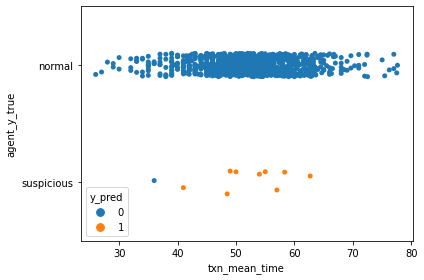

In [255]:
%matplotlib inline
# decision tree
def reset_X():
    sender_info = pd.read_csv('sender_info.csv')
    sender_info = sender_info.sample(frac=1)
    X = sender_info[['sender_id', 'txn_mean_time', 'y_true', 'in_degree']]
    return sender_info, X

rand_generator = np.random.default_rng()
sender_info, X = reset_X()

X.y_true.value_counts()
#train_X = X[['txn_mean_time', 'in_degree']]
train_X = sender_info[['txn_mean_time','in_degree', 'out_degree']]
train_X = sender_info[['txn_mean_time', 'num_txns']]
train_X = train_X#.to_numpy()#.reshape(-1,1)
y_true = X.y_true
y_true.value_counts()


#clf = mixture.GaussianMixture()
#clf = IsolationForest(contamination=0.1, random_state=123).fit(train_X)
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(train_X, sender_info.y_true)
y_pred = clf.predict(train_X)
sender_info['y_pred'] = y_pred
print(sender_info.y_pred.value_counts())

#display(sender_info)
#sender_info['y_pred'] = sender_info['y_pred']#.apply(lambda x: 1 if x== else 0)
#sender_info.sample()
fig, ax = plt.subplots()
#sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
plt.tight_layout()
plt.show()

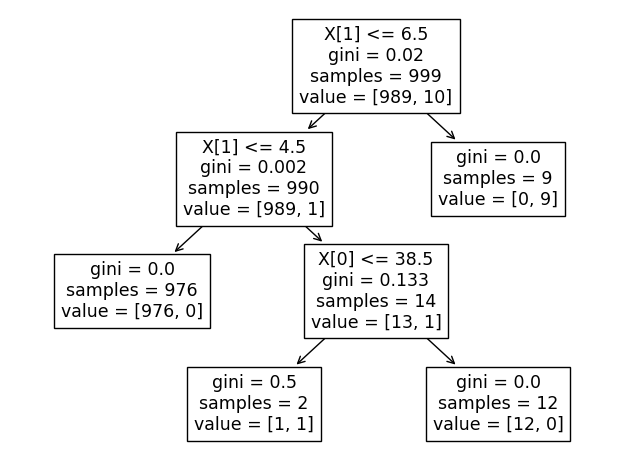

In [256]:
%matplotlib inline
sns.reset_defaults()
plt.subplots()
tree.plot_tree(clf)
plt.tight_layout()
plt.show()

# formal it 

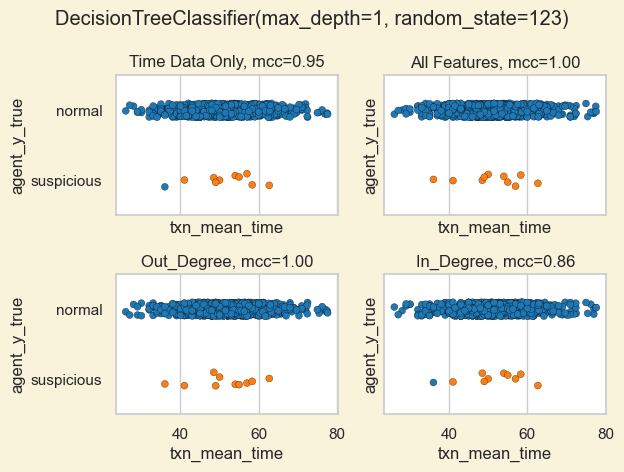

/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


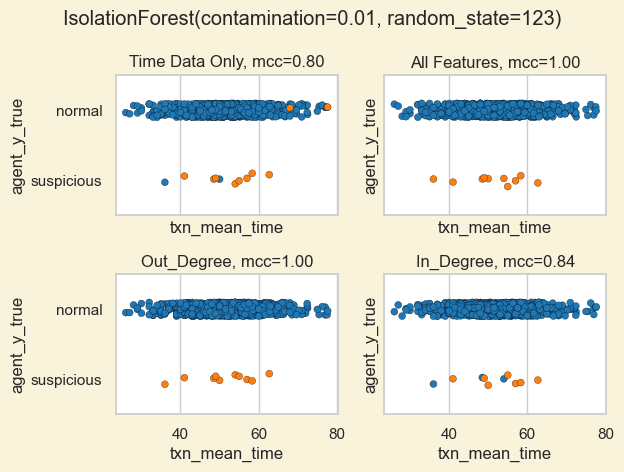

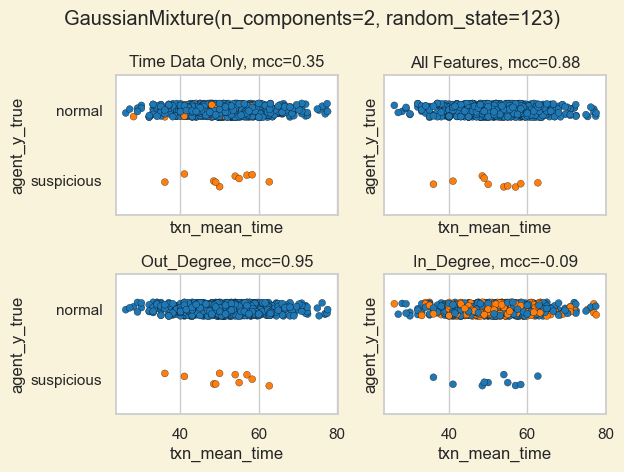

In [342]:
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')
sns.set_style('whitegrid')

# decision tree
rand_generator = np.random.default_rng()
def reset_X():
    sender_info = pd.read_csv('sender_info.csv')
    sender_info = sender_info.sample(frac=1)
    #X = sender_info[['sender_id', 'txn_mean_time', 'y_true', 'in_degree']]
    return sender_info

def whew():
    param_simple = ['txn_mean_time', 'num_txns']
    param_full = ['txn_mean_time', 'num_txns', 'out_degree', 'in_degree']
    param_out = ['out_degree']
    param_in = ['in_degree']

    params = [param_simple, param_full, param_in, param_out]

    sender_info = reset_X()
    #clf = mixture.GaussianMixture()
    #clf = IsolationFrest(contamination=0.1, random_state=123).fit(train_X)

    clf_tree = tree.DecisionTreeClassifier(max_depth=1, random_state=123)
    clf_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=123)
    clf_gmm = mixture.GaussianMixture(n_components=2, random_state=123)
    clfs = [clf_tree, clf_forest, clf_gmm]

    titles = ['Time Data Only', 'All Features', 'Out_Degree', 'In_Degree']

    for nth, clf in enumerate(clfs):
        #print(nth)
        fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
        for nthplot, param in enumerate(params):
            train_X = sender_info[param]

            if nth == 0:
                # decision tree
                clf.fit(train_X, sender_info.y_true)
            else:
                clf.fit(train_X)
            y_pred = clf.predict(train_X)

            sender_info['y_pred'] = y_pred # for plotting
            #/print(type(sender_info))
            if nth == 1: # isolation forest 
                sender_info['y_pred'] = sender_info['y_pred'].apply(
                    lambda x: 1 if x==-1 else 0)

            score_mcc = mcc(sender_info.y_true, sender_info.y_pred)

            sns.stripplot(
                data=sender_info, x='txn_mean_time', y='agent_y_true',
                hue='y_pred', ax=axes.flatten()[nthplot], 
                edgecolor='k', linewidth=0.2, hue_order=[0,1]
                ).set(
                    title=f'{titles[nthplot]}, mcc={score_mcc:.2f}')
            axes.flatten()[nthplot].get_legend().remove()

            
            #print(sender_info.y_pred.value_counts())

        #sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
        plt.suptitle(clf)
        plt.tight_layout()
        fig.patch.set_facecolor('#F9F3DC')
        plt.savefig(f'./{clf}.pdf')
        plt.show()
whew()

# kdeplot

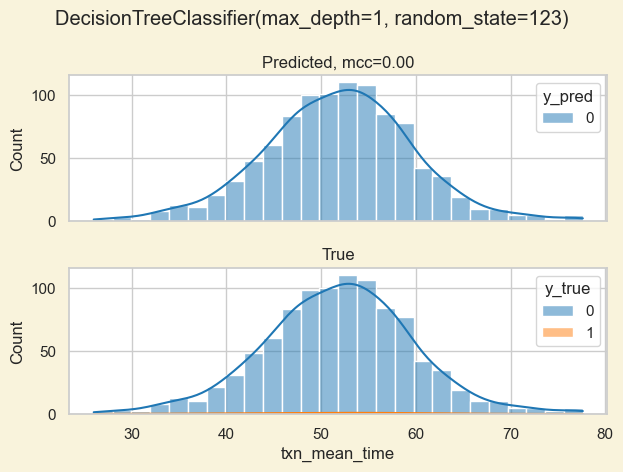

/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


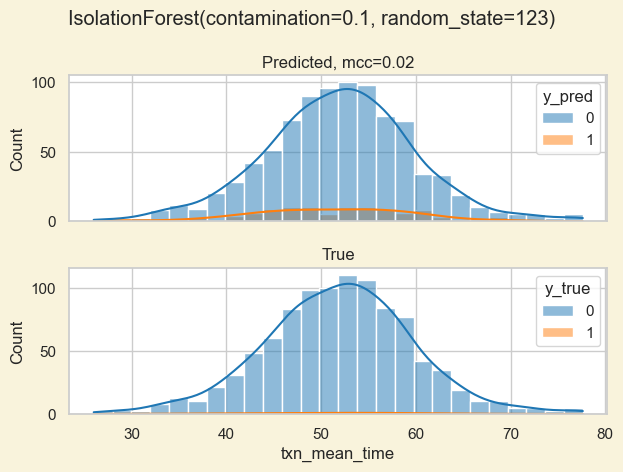

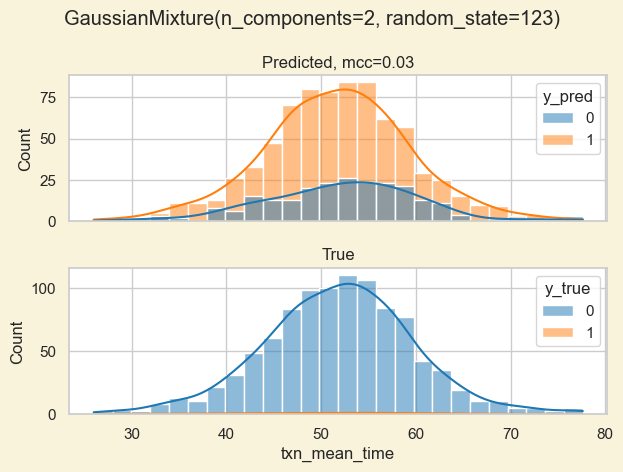

In [332]:
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')
sns.set_style('whitegrid')

# decision tree
rand_generator = np.random.default_rng()
def reset_X():
    sender_info = pd.read_csv('sender_info.csv')
    sender_info = sender_info.sample(frac=1)
    #X = sender_info[['sender_id', 'txn_mean_time', 'y_true', 'in_degree']]
    return sender_info

def whew2():
    sender_info = reset_X()
    #clf = mixture.GaussianMixture()
    #clf = IsolationFrest(contamination=0.1, random_state=123).fit(train_X)

    clf_tree = tree.DecisionTreeClassifier(max_depth=1, random_state=123)
    clf_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
    clf_gmm = mixture.GaussianMixture(n_components=2, random_state=123)
    clfs = [clf_tree, clf_forest, clf_gmm]

    #titles = ['Time Data Only', 'All Features', 'Out_Degree', 'In_Degree']
    for nth, clf in enumerate(clfs):
        #print(nth)
        fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

        if nth == 0:
            # decision tree
            clf.fit(train_X, sender_info.y_true)
        else:
            clf.fit(train_X)
        y_pred = clf.predict(train_X)

        sender_info['y_pred'] = y_pred # for plotting
        #/print(type(sender_info))
        score_mcc = mcc(sender_info.y_true, sender_info.y_pred)

        if nth == 1: # isolation forest 
            sender_info['y_pred'] = sender_info['y_pred'].apply(
                lambda x: 1 if x==-1 else 0)

        sns.histplot(
            data=sender_info, x='txn_mean_time', 
            hue='y_pred', ax=ax1, 
            kde=True).set(
                title=f'Predicted, mcc={score_mcc:.2f}')
        sns.histplot(
            data=sender_info, x='txn_mean_time', 
            hue='y_true', ax=ax2, 
            kde=True).set(
                title=f'True')

            #sns.stripplot(
                #data=sender_info, x='txn_mean_time', y='agent_y_true',
                #hue='y_pred', ax=axes.flatten()[nthplot], 
                #edgecolor='k', linewidth=0.2
                #).set(
                    #title=f'{titles[nthplot]}, mcc={score_mcc:.2f}')
            #axes.flatten()[nthplot].get_legend().remove()

            
            #print(sender_info.y_pred.value_counts())

        #sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
        plt.suptitle(clf)
        plt.tight_layout()
        fig.patch.set_facecolor('#F9F3DC')
        plt.savefig(f'./kde_{clf}.pdf')
        plt.show()
whew2()

# metrics

In [321]:
acc = accuracy_score(y_true, y_pred)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       1.00      0.90      0.95        10

    accuracy                           1.00       999
   macro avg       1.00      0.95      0.97       999
weighted avg       1.00      1.00      1.00       999

